In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations
# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder, CountEncoder
import sys
sys.path.append("../../")
import src.soporte_encoding  as se
from src.soporte_graficas import (
    visualizar_categoricas
)
from src.SupportPreProcesamiento import (
    separarar_df
)

In [2]:
df = pd.read_csv("../../datos/03_api_rent_sin_nulos.csv")

# Encoding
- Vamos a pasar todas las variables a numéricas
- Hay que saber si tienen orden o no

### Pasar las columnas a su tipo correcto

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   propertyType      353 non-null    object 
 1   status            353 non-null    object 
 2   price             353 non-null    float64
 3   size              353 non-null    float64
 4   rooms             353 non-null    object 
 5   bathrooms         353 non-null    object 
 6   floor             353 non-null    object 
 7   exterior          353 non-null    object 
 8   hasLift           353 non-null    object 
 9   distancia_centro  353 non-null    object 
 10  municipality      353 non-null    object 
dtypes: float64(2), object(9)
memory usage: 30.5+ KB


### Separar df para ver si hay orden o no
- Hay un bug o algo, no puedo hacer estás gráficas(tal vez sean demasiadas)

In [4]:
numericas, categoricas = separarar_df(df)

Vamos a pintar un boxplot primero (Lo dejo como prueba)

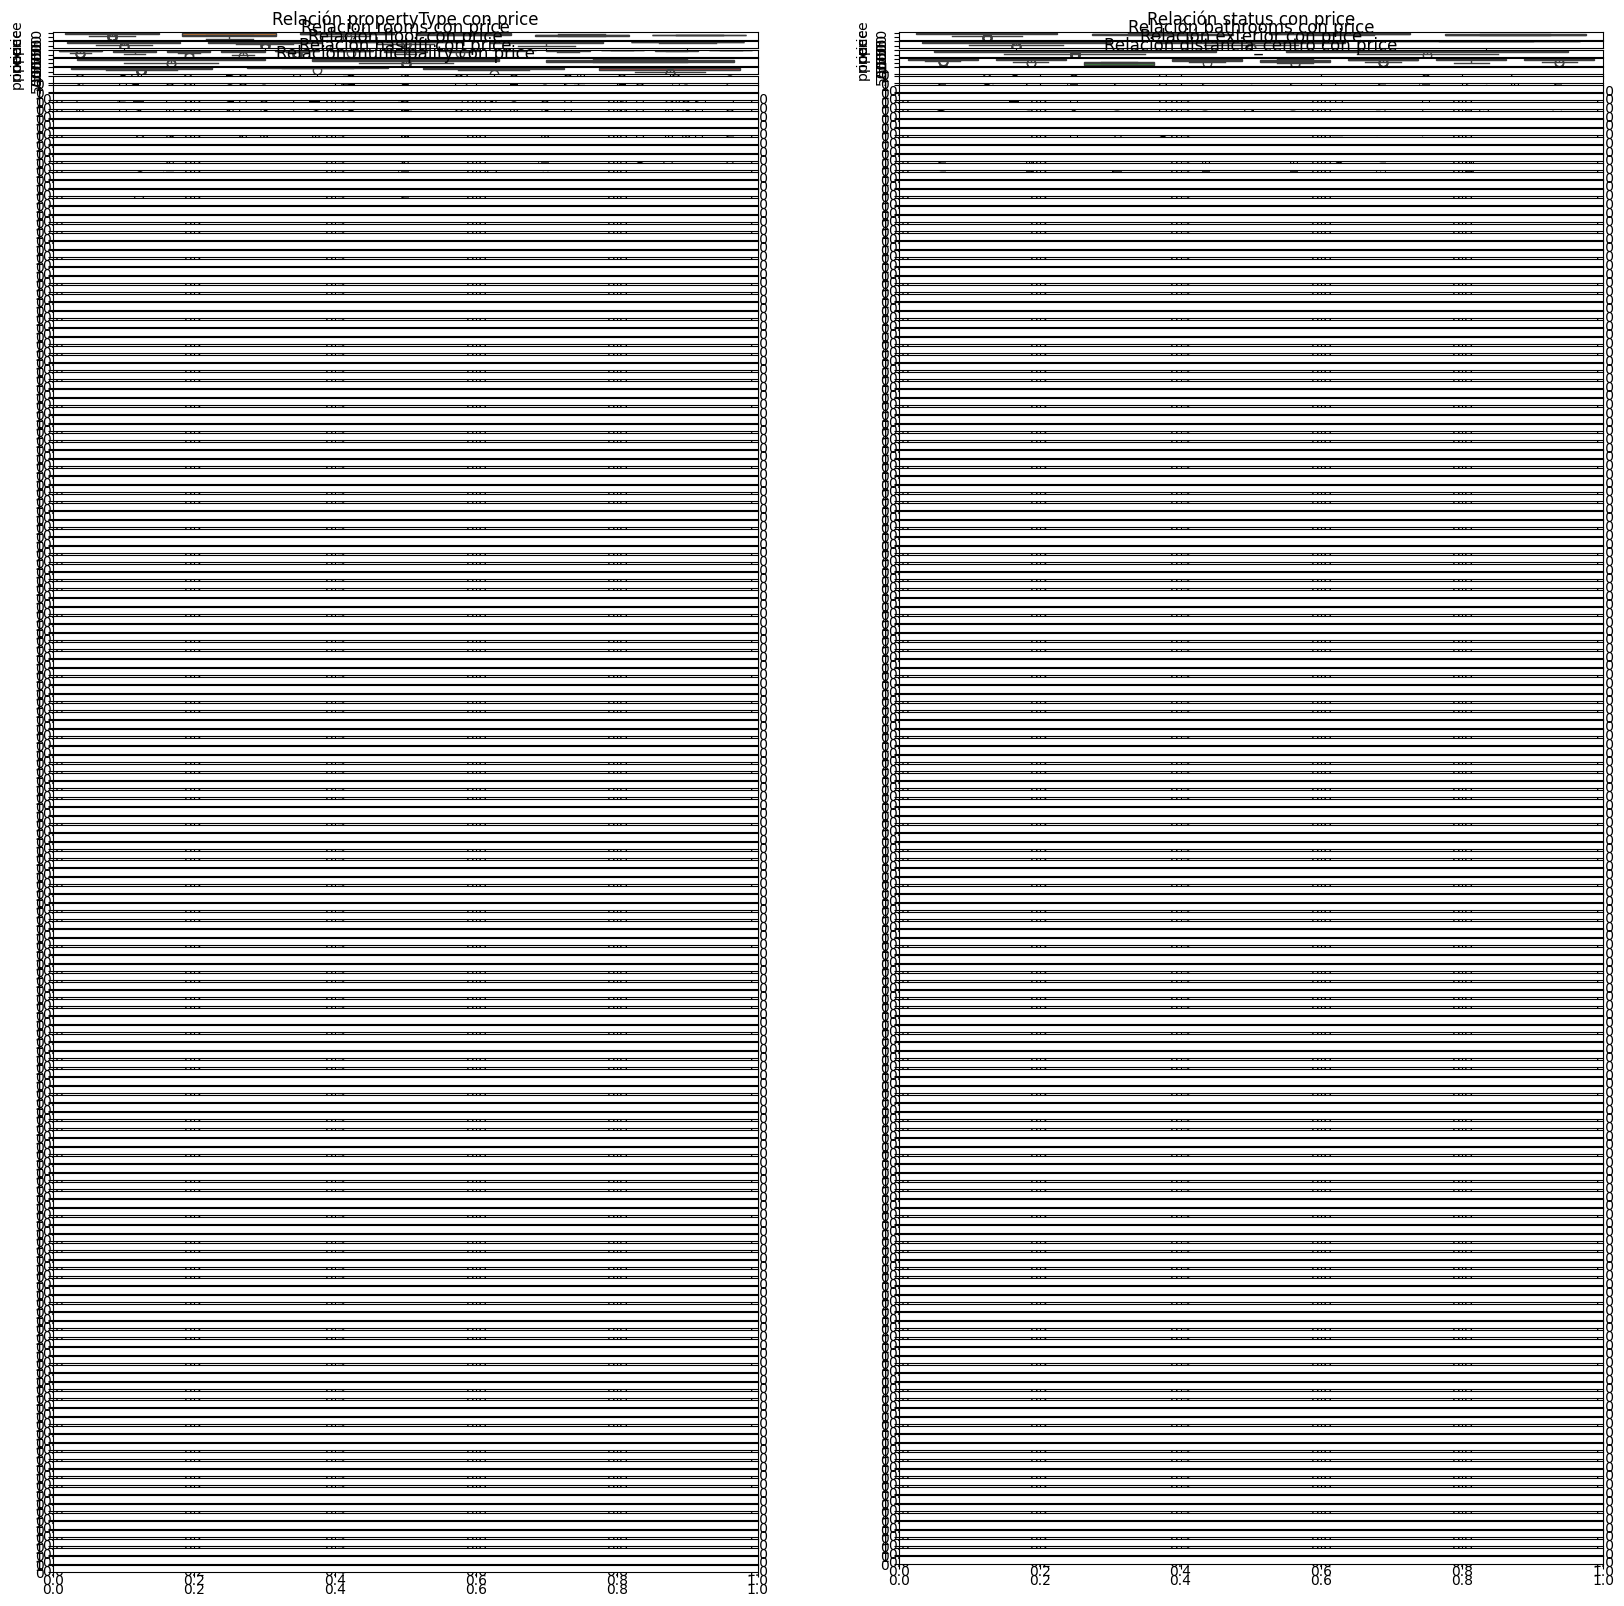

In [5]:
visualizar_categoricas(df,categoricas,"price","boxplot",grafica_size=(20,20))

Bueno yo no se vosotros, pero yo me he quedado igual, probamos con el barplot? (Lo dejo como prueba de que no funciona)

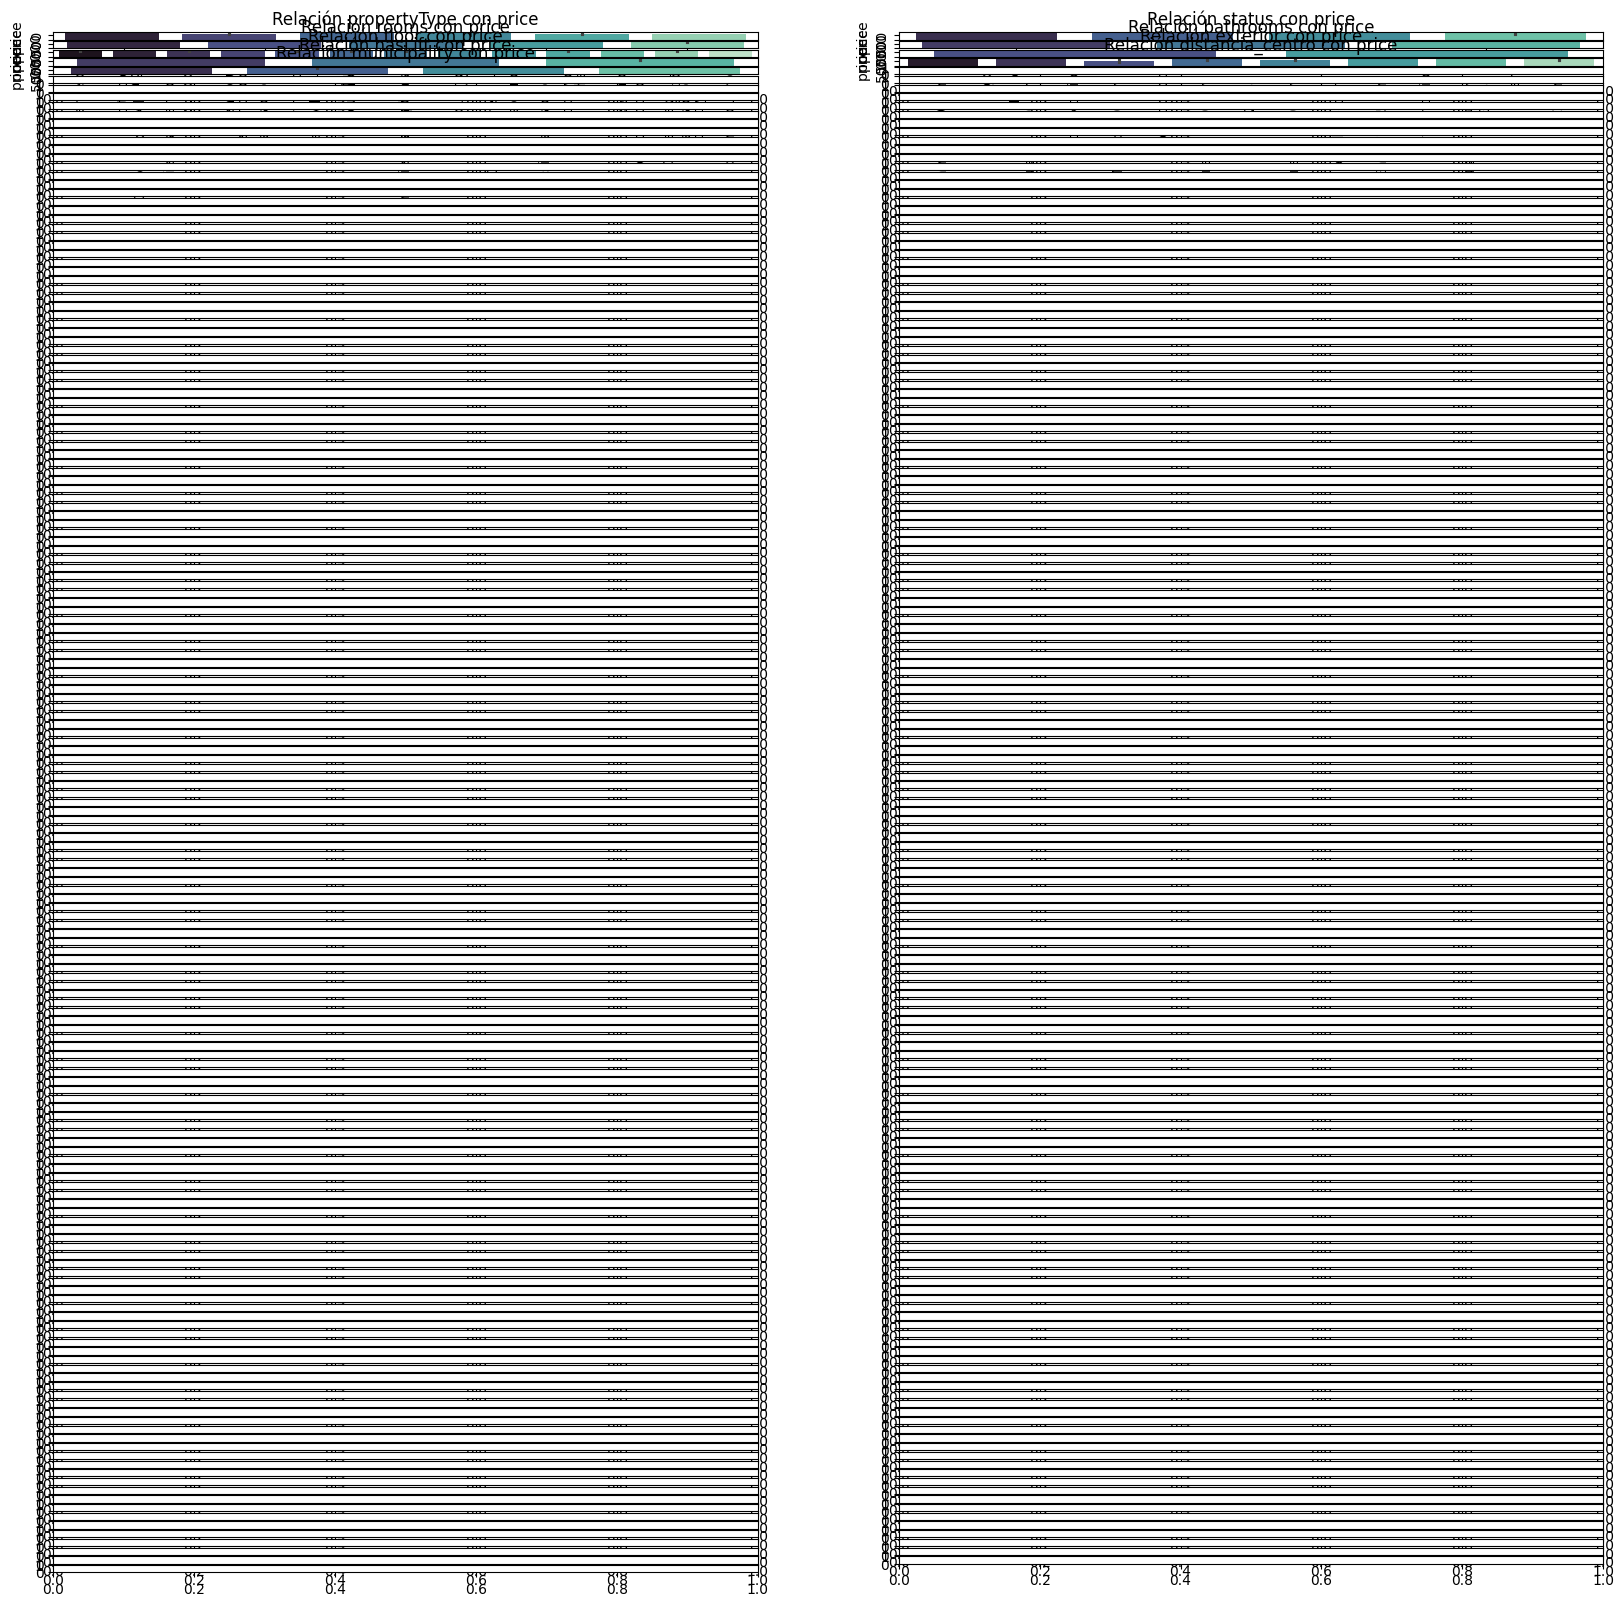

In [6]:
visualizar_categoricas(df,categoricas,"price","barplot",grafica_size=(20,20))

# Analicemos estadísticamente
- Dos opciones: mannwhitneyu
- Mas de dos opciones: Kruskal

No es una distribución normal

In [7]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in categoricas:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 10.491276765664804
Valor p: 0.062453362538402654
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-10.0000,1.0000,-207.3147,187.3147,chalet-countryHouse
1,79.2857,0.2949,-29.4294,188.0008,chalet-duplex
2,87.5596,0.1184,-11.6306,186.7497,chalet-flat
3,9.9000,0.9999,-102.5867,122.3867,chalet-penthouse
4,79.6250,0.2206,-22.0687,181.3187,chalet-studio
5,89.2857,0.6984,-87.5915,266.1629,countryHouse-duplex
6,97.5596,0.5771,-73.6282,268.7473,countryHouse-flat
7,19.9000,0.9996,-159.3200,199.1200,countryHouse-penthouse
8,89.6250,0.6724,-83.0254,262.2754,countryHouse-studio
9,8.2739,0.9959,-38.5355,55.0832,duplex-flat



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 11.541040965775425
Valor p: 0.009132723494666343
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,32.8153,0.2012,-10.1772,75.8078,desconocido-good
1,13.8791,0.9349,-46.7829,74.5412,desconocido-newdevelopment
2,-22.4286,0.9621,-141.4847,96.6276,desconocido-renew
3,-18.9361,0.6914,-63.4855,25.6132,good-newdevelopment
4,-55.2438,0.5785,-166.9538,56.4662,good-renew
5,-36.3077,0.8619,-155.9349,83.3195,newdevelopment-renew



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1 habitacion', '2 habitaciones', '3 habitaciones', 'sin habitaciones', '4 habitaciones']

Realizando test de Kruskal...
Estadístico de prueba: 6.997445029790361
Valor p: 0.13602330549397834
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,15.3159,0.2789,-5.9159,36.5476,1 habitacion-2 habitaciones
1,22.5779,0.1712,-5.1881,50.3438,1 habitacion-3 habitaciones
2,30.6804,0.9113,-67.1878,128.5487,1 habitacion-4 habitaciones
3,8.2043,0.9324,-20.1500,36.5585,1 habitacion-sin habitaciones
4,7.2620,0.9511,-20.2748,34.7988,2 habitaciones-3 habitaciones
5,15.3646,0.9928,-82.4389,113.1680,2 habitaciones-4 habitaciones
6,-7.1116,0.9579,-35.2415,21.0183,2 habitaciones-sin habitaciones
7,8.1026,0.9994,-91.3242,107.5293,3 habitaciones-4 habitaciones
8,-14.3736,0.7616,-47.7121,18.9648,3 habitaciones-sin habitaciones
9,-22.4762,0.9720,-122.0688,77.1164,4 habitaciones-sin habitaciones



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1 aseo', '2 aseos', '3 aseos']

Realizando test de Kruskal...
Estadístico de prueba: 2.17914787981004
Valor p: 0.3363597726585303
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-16.9578,0.2492,-41.9852,8.0696,1 aseo-2 aseos
1,55.4476,0.6376,-88.7934,199.6886,1 aseo-3 aseos
2,72.4054,0.4733,-73.5403,218.3511,2 aseos-3 aseos



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['tercero', 'bajo', 'segundo', 'desconocido', 'primero', 'quinto', 'entreplanta', 'cuarto', 'sotano', 'octavo', 'septimo', 'sexto', 'decimo cuarto']

Realizando test de Kruskal...
Estadístico de prueba: 30.876255258153428
Valor p: 0.002057419134502309
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,37.2612,0.1899,-6.5445,81.0670,bajo-cuarto
1,71.6552,0.9939,-130.9700,274.2803,bajo-decimo cuarto
2,-8.2337,0.9999,-44.7923,28.3249,bajo-desconocido
3,0.8218,1.0000,-85.3334,86.9771,bajo-entreplanta
4,44.6552,0.9682,-59.2012,148.5116,bajo-octavo
...,...,...,...,...,...
73,-15.0000,1.0000,-261.0520,231.0520,septimo-sotano
74,-52.0208,0.9997,-255.0034,150.9617,septimo-tercero
75,10.0000,1.0000,-190.9006,210.9006,sexto-sotano
76,-27.0208,1.0000,-172.0084,117.9667,sexto-tercero



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['vista exterior', 'vista interior']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 10691.5
Valor p: 0.18180926288442967
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-10.5531,0.2026,-26.8119,5.7056,vista exterior-vista interior



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['tiene ascensor', 'no tiene ascensor', 'desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 13.627872283280148
Valor p: 0.0010983610754482008
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,37.4113,0.0345,2.1662,72.6565,desconocido-no tiene ascensor
1,52.0307,0.0016,16.9181,87.1432,desconocido-tiene ascensor
2,14.6193,0.0694,-0.8887,30.1274,no tiene ascensor-tiene ascensor



###########################

Estamos analizando la variable DISTANCIA_CENTRO
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable distancia_centro las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Entre 5 y 10 km', 'Entre 10 y 20 km', 'Mas de 50 km', 'Entre 30 y 40 km', 'Entre 40 y 50 km', 'Entre 1 y 5 km', 'Entre 20 y 30 km', 'Menos de 1 km']

Realizando test de Kruskal...
Estadístico de prueba: 50.242312632000186
Valor p: 1.2945889652583908e-08
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1.8831,1.0000,-27.1857,30.9520,Entre 1 y 5 km-Entre 10 y 20 km
1,-1.7755,1.0000,-29.9682,26.4172,Entre 1 y 5 km-Entre 20 y 30 km
2,-31.7823,0.2155,-71.1487,7.5842,Entre 1 y 5 km-Entre 30 y 40 km
3,-71.3656,0.0000,-107.7836,-34.9476,Entre 1 y 5 km-Entre 40 y 50 km
4,10.2604,0.9486,-17.2982,37.8190,Entre 1 y 5 km-Entre 5 y 10 km
5,-204.0323,0.0000,-288.5065,-119.5580,Entre 1 y 5 km-Mas de 50 km
6,-12.3656,0.9960,-64.0081,39.2770,Entre 1 y 5 km-Menos de 1 km
7,-3.6586,0.9999,-31.4950,24.1778,Entre 10 y 20 km-Entre 20 y 30 km
8,-33.6654,0.1505,-72.7775,5.4467,Entre 10 y 20 km-Entre 30 y 40 km
9,-73.2487,0.0000,-109.3916,-37.1058,Entre 10 y 20 km-Entre 40 y 50 km



###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Clase Media-Alta', 'Clase Alta', 'Clase Obrera', 'Clase Media']

Realizando test de Kruskal...
Estadístico de prueba: 13.676646647757684
Valor p: 0.003380025836555914
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-43.8450,0.0766,-90.7600,3.0701,Clase Alta-Clase Media
1,-19.5949,0.6934,-65.8293,26.6395,Clase Alta-Clase Media-Alta
2,-39.1961,0.3115,-97.8061,19.4139,Clase Alta-Clase Obrera
3,24.2501,0.0025,6.6081,41.8921,Clase Media-Clase Media-Alta
4,4.6489,0.9907,-35.4604,44.7582,Clase Media-Clase Obrera
5,-19.6012,0.5717,-58.9122,19.7098,Clase Media-Alta-Clase Obrera



###########################



# Resultados
### Variables ordinales
- bathrooms
- municipality
- distancia-centro
### Variables Nominales
- propertyType
- status
- rooms
- floor
- exterior
- hasLift

# Tenemos Ordinales y Nominales
- Las ordinales las gestionaremos con Target Encoding, que codifica con la media del objetivo para la categoría
- Para las nominales usaremos one-Hot Encoding

In [18]:
df.sample()

,price,size,bathrooms,distancia_centro,municipality,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_desconocido,status_good,status_newdevelopment,status_renew,rooms_1 habitacion,rooms_2 habitaciones,rooms_3 habitaciones,rooms_4 habitaciones,rooms_sin habitaciones,floor_bajo,floor_cuarto,floor_decimo cuarto,floor_desconocido,floor_entreplanta,floor_octavo,floor_primero,floor_quinto,floor_segundo,floor_septimo,floor_sexto,floor_sotano,floor_tercero,exterior_vista exterior,exterior_vista interior,hasLift_desconocido,hasLift_no tiene ascensor,hasLift_tiene ascensor
170,620.0,75.0,694.552381,699.726071,688.480074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Ordinales

In [9]:
cols_ordinales = ["bathrooms","municipality","distancia_centro"]

### Target Encoder

In [10]:
target_encoder = TargetEncoder(cols=cols_ordinales)
df = target_encoder.fit_transform(df,df[["price"]])

In [11]:
df.sample()

,propertyType,status,price,size,rooms,bathrooms,floor,exterior,hasLift,distancia_centro,municipality
129,flat,good,610.0,72.0,1 habitacion,694.552381,bajo,vista interior,tiene ascensor,703.300204,677.821984


# Nominales

In [12]:
cols_nominales = ["propertyType","status","rooms","floor","exterior","hasLift"]

### OneHotEncoder

In [13]:
encoder = OneHotEncoder(categories='auto', 
                        drop=None, 
                        sparse_output=True, 
                        dtype='float', 
                        handle_unknown='error')

# Ajustar el codificador a los datos y transformarlos
encoder_trans = encoder.fit_transform(df[cols_nominales])

# lo siguiente que hacemos es convertir el objeto devuelto por el fit_transform a array para poder verlo
encoder_array = encoder_trans.toarray()

# usaremos el método '.get_feature_names_out()' para extraer el nombre de las columnas
nombre_columnas = encoder.get_feature_names_out()

# creamos un DataFrame con los resultados obtenidos de la transformación
encoder_df = pd.DataFrame(encoder_array, columns = nombre_columnas)

# concatenamos estos resultados con el DataFrame original
df = pd.concat([df, encoder_df], axis = 1)

In [14]:
df.sample()

,propertyType,status,price,size,rooms,bathrooms,floor,exterior,hasLift,distancia_centro,municipality,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_desconocido,status_good,status_newdevelopment,status_renew,rooms_1 habitacion,rooms_2 habitaciones,rooms_3 habitaciones,rooms_4 habitaciones,rooms_sin habitaciones,floor_bajo,floor_cuarto,floor_decimo cuarto,floor_desconocido,floor_entreplanta,floor_octavo,floor_primero,floor_quinto,floor_segundo,floor_septimo,floor_sexto,floor_sotano,floor_tercero,exterior_vista exterior,exterior_vista interior,hasLift_desconocido,hasLift_no tiene ascensor,hasLift_tiene ascensor
311,flat,good,650.0,85.0,2 habitaciones,694.552381,segundo,vista exterior,no tiene ascensor,647.046868,702.071795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Eliminar columnas nominales
- Ya tenemos las columnas generadas y ya no nos aportan información

In [15]:
df.drop(columns=cols_nominales,inplace=True)

In [16]:
df.sample()

,price,size,bathrooms,distancia_centro,municipality,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_desconocido,status_good,status_newdevelopment,status_renew,rooms_1 habitacion,rooms_2 habitaciones,rooms_3 habitaciones,rooms_4 habitaciones,rooms_sin habitaciones,floor_bajo,floor_cuarto,floor_decimo cuarto,floor_desconocido,floor_entreplanta,floor_octavo,floor_primero,floor_quinto,floor_segundo,floor_septimo,floor_sexto,floor_sotano,floor_tercero,exterior_vista exterior,exterior_vista interior,hasLift_desconocido,hasLift_no tiene ascensor,hasLift_tiene ascensor
239,750.0,66.0,694.552381,711.754484,702.071795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Guardamos
- Nos vamos a feature scaling con este df

In [17]:
df.to_csv("../../datos/04_rent_target_onehot_encoded.csv",index=False)